## Shubham Sharma
# IIT Bombay
This is a solution file for lab 11


#IE507 Lab 11
###Random processes over networks
###November 11, 2020
(Ashutosh Mahajan)

We will simulate some random processes over graphs or networks in this lab. Recall that a network or a graph is a set of nodes along with a set of links or edges that connect pairs of nodes. For instance, a node may denote a location in a map and an edge could be a road that links two locations. Or nodes may represent people and links may represent social relationships. Random events may take place over nodes and links which may lead to an overall interesting behaviour over the network which can be analyzed. Here is an example of a graph with 5 nodes and 7 edges. 



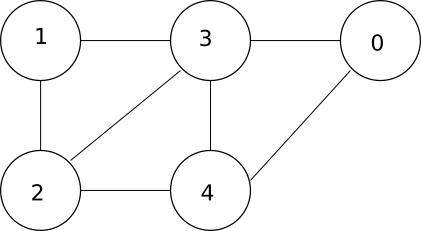

Let us first look at one way of storing a graph before looking at some questions. One way is by assigning an index (number) to each node. An edge is then just a pair of nodes. For example, in the above graph we have nodes 0,1,...,5. Examples of edges are (2,3), (0,4), (0,3) etc. One can represent the edges in python using two lists: one containing a list of all head nodes and the other containing all the tail nodes. For the above graph we will have

tl = [0 0 1 1 2 2 3]

hd = [3 4 2 3 3 4 4]

representing edges (0,3), (0,4), ..., (3,4). Let us fetch some graph data now of somewhat bigger graphs.


In [ ]:
%%bash
rm -fv net1.py net5.py net7.py
wget -q https://www.ieor.iitb.ac.in/files/faculty/amahajan/net1.py
wget -q https://www.ieor.iitb.ac.in/files/faculty/amahajan/net5.py
wget -q https://www.ieor.iitb.ac.in/files/faculty/amahajan/net7.py
ls

net1.py
net5.py
net7.py
sample_data


net1.py has 10 nodes, net2.py 50 and net7.py 800. For our exercises, we will need to store the graphs in a different manner. We will have a list of nodes and have a list of neighbors of each node. The following code reads net1.py and converts it into this form. You may try changing net1 to net7.

In [ ]:
import matplotlib.pyplot as plt
import net1
import net5
import net7

class Node:
  def __init__(self, ind):
	  self.ind = ind
	  self.nhbs = []
	  self.size_n = 0

  def add_neighbor(self, nhb):
	  if nhb not in self.nhbs:
		  self.nhbs.append(nhb)
		  self.size_n += 1

  def write(self):
	  # for debugging
	  print("node index = ", self.ind, " neighbors =", self.size_n, " ", end='')
	  for i in self.nhbs:
		  print(i.ind, end=' ')
	  print()

# G = net5
# n = G.n
# m = len(G.hd)
# nodes = []

# # First add all nodes
# for i in range(n):
# 	nn = Node(i+1)
# 	nodes.append(nn)

# # Next add links or neighbors
# for i in range(m):
# 	# take each edge and add neighbors
# 	t = nodes[G.tl[i]-1]
# 	h = nodes[G.hd[i]-1]
# 	t.add_neighbor(h)
# 	h.add_neighbor(t)
	
# # Graph is ready, now analyze it
# # let us first print information about some nodes

# nodes[0].write()
# nodes[9].write()



node index =  1  neighbors = 20  389 168 79 293 158 173 186 277 221 133 286 213 449 33 55 126 388 296 47 298 
node index =  10  neighbors = 18  17 432 148 311 307 319 299 42 489 431 35 185 34 330 175 498 270 327 


Like last time, we can use [matplotlib package to make a plot](https://matplotlib.org/3.2.1/gallery/index.html) of number of neighbors of each node.

Text(0.5, 1.0, 'Distribution of the number of neighbors of a node')

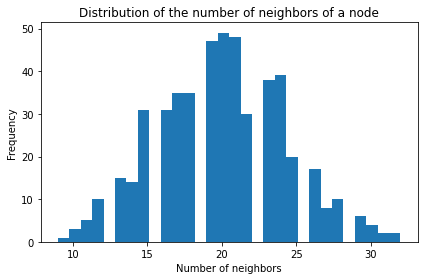

In [ ]:
l = []
for nn in nodes:
  l.append(nn.size_n)
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist(l, bins=30)
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of neighbors')

ax.set_title('Distribution of the number of neighbors of a node')


Q.1 Let us model the behaviour of a taxi cab serving customers over this network. Suppose each node represents a locality in Mumbai. At any given node, a cab driver may get a passenger for other localities. Depending on the locality he may get passengers to only some of the localities (and not all). These destination nodes can be modeled as the neighbors of the node where the taxi is currently stationed. Starting from node 0, suppose the taxi is equally likely to get a passenger to any of the neighbors, and this process is repeated many times. Simulate the movement of taxi and estimate roughly how many trips are required on average for it to return to node 0. Remember to run your simulation several times. Next, pick a node with the largest degree (number of neighbors) in this network. Suppose we start from this node, what is the expected time to return to the starting node. If we choose a node with the smallest degree, do we see a significant change in the number of trips? 

Q. 2 A different model now. Suppose two adversarial countries have one submarine each patroling in a sea. Let the nodes of the network denote areas of interest where these submarines visit regularly. Let a 'neighboring' node represent an area adjacent geographically to a given node. Suppose the two submarines start at week t=0, one from Node 0 and the other from Node 25 and move by randomly moving to one of the neighbors in the next week. Can the two ever 'meet' or be in a same location simultaneously? Plot a histogram to show the distribution of time to meet. What is the expected time? Suppose they start from the same location, what is the expected time for the next meeting.



Q.3 Lastly, suppose a node represents a person and a link between two nodes indicates that the two persons are friends over a social network. Suppose node-0 (initiator) starts spreading a rumour in the following way. The initiator sends the message to all his friends. Each friend randomly decides to either ignore the message after seeing it (probability 0.75), or forward it to any two contacts different from the one who sent it to him/her (probability 0.20) or to all of his contacts (0.05 probability). A person who has already received the message earlier ignores it completely. Estimate how soon will half the population on the network platform have seen the message?

In [ ]:
import numpy as np
from tqdm import tqdm_notebook
np.random.seed(0)
def give_simulations(node):
  # this function willl tell the time it would take to come to origin
  current_node = node
  next_choosen_nbr = current_node.nhbs[np.random.randint(0, len(current_node.nhbs))]
  current_node = next_choosen_nbr
  steps = 1
  while current_node != node:
    next_choosen_nbr = current_node.nhbs[np.random.randint(0, len(current_node.nhbs))]
    current_node = next_choosen_nbr
    steps += 1
  return steps

def give_nodes(G):
  n = G.n
  m = len(G.hd)
  nodes = []

  # First add all nodes
  for i in range(n):
    nn = Node(i+1)
    nodes.append(nn)

  # Next add links or neighbors
  for i in range(m):
    # take each edge and add neighbors
    t = nodes[G.tl[i]-1]
    h = nodes[G.hd[i]-1]
    t.add_neighbor(h)
    h.add_neighbor(t)  

  return nodes

def give_max_min(nodes):
  #return the node with maximum neighbours
  temp = [len(nodes[i].nhbs) for i in range(len(nodes))]
  max_ix = np.argmax(temp)
  min_ix = np.argmin(temp)
  return max_ix, min_ix


nodes_net1 =  give_nodes(net1)
nodes_net5 =  give_nodes(net5)
nodes_net7 =  give_nodes(net7)

Solution: Question1

In [ ]:
time = 20000

trip_net1_node0 = []
trip_net5_node0 = []
trip_net7_node0 = []

trip_net1_node_max = []
trip_net5_node_max = []
trip_net7_node_max = []

trip_net1_node_min = []
trip_net5_node_min = []
trip_net7_node_min = []

max_ix_net1, min_ix_net1 = give_max_min(nodes_net1)
max_ix_net5, min_ix_net5 = give_max_min(nodes_net5)
max_ix_net7, min_ix_net7 = give_max_min(nodes_net7)
for t in tqdm_notebook(range(time)):
  #when nodes[0] is to be taken
  trip_net1_node0.append(give_simulations(nodes_net1[0]))
  trip_net5_node0.append(give_simulations(nodes_net5[0]))
  trip_net7_node0.append(give_simulations(nodes_net7[0]))
  ##
  #when node with max idx is to be taken
  trip_net1_node_max.append(give_simulations(nodes_net1[max_ix_net1]))
  trip_net5_node_max.append(give_simulations(nodes_net5[max_ix_net5]))
  trip_net7_node_max.append(give_simulations(nodes_net7[max_ix_net7]))
  ##
  #when node with min idx is to be taken
  trip_net1_node_min.append(give_simulations(nodes_net1[min_ix_net1]))
  trip_net5_node_min.append(give_simulations(nodes_net5[min_ix_net5]))
  trip_net7_node_min.append(give_simulations(nodes_net7[min_ix_net7]))

print('For network 1')
print('Expected time to return to the starting node for node 0', np.mean(trip_net1_node0))
print('Expected time to return to the starting node for max neighbor node', np.mean(trip_net1_node_max))
print('Expected time to return to the starting node for min neighbor', np.mean(trip_net1_node_min))
print('_________')
print('For network 5')
print('Expected time to return to the starting node for node 0', np.mean(trip_net5_node0))
print('Expected time to return to the starting node for max neighbor node', np.mean(trip_net5_node_max))
print('Expected time to return to the starting node for min neighbor', np.mean(trip_net5_node_min))
print('_________')
print('For network 7')
print('Expected time to return to the starting node for node 0', np.mean(trip_net7_node0))
print('Expected time to return to the starting node for max neighbor node', np.mean(trip_net7_node_max))
print('Expected time to return to the starting node for min neighbor', np.mean(trip_net7_node_min))
print('_________')


  






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



For network 1
Expected time to return to the starting node for node 0 6.6612
Expected time to return to the starting node for max neighbor node 6.76725
Expected time to return to the starting node for min neighbor 20.2377
_________
For network 5
Expected time to return to the starting node for node 0 498.10015
Expected time to return to the starting node for max neighbor node 316.3199
Expected time to return to the starting node for min neighbor 1101.0636
_________
For network 7
Expected time to return to the starting node for node 0 691.2174
Expected time to return to the starting node for max neighbor node 448.63685
Expected time to return to the starting node for min neighbor 1800.2221
_________


Solution: Question2

In [ ]:
def give_time_of_meet(node1, node2):
  #returns when node1 will meet node 2
  current_node1 = node1
  current_node2 = node2
  next_choosen_node1 = current_node1.nhbs[np.random.randint(0, len(current_node1.nhbs))]
  next_choosen_node2 = current_node2.nhbs[np.random.randint(0, len(current_node2.nhbs))]
  current_node1 = next_choosen_node1
  current_node2 = next_choosen_node2
  steps = 1
  while current_node1 != current_node2:
    next_choosen_node1 = current_node1.nhbs[np.random.randint(0, len(current_node1.nhbs))]
    next_choosen_node2 = current_node2.nhbs[np.random.randint(0, len(current_node2.nhbs))]
    current_node1 = next_choosen_node1
    current_node2 = next_choosen_node2
    steps += 1
  return steps

nodes_net5 =  give_nodes(net5)
nodes_net7 =  give_nodes(net7)

In [ ]:
meet_array_net5 = []
meet_array_net7 = []
time = 20000
for i in tqdm_notebook(range(time)):
  meet_array_net5.append(give_time_of_meet(nodes_net5[0], nodes_net5[25]))
  meet_array_net7.append(give_time_of_meet(nodes_net7[0], nodes_net7[25]))

print('avg time for net 5', np.mean(meet_array_net5))
print('avg time for net 7', np.mean(meet_array_net7))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



avg time for net 5 497.89655
avg time for net 7 808.09985


Text(0.5, 1.0, 'For net 5')

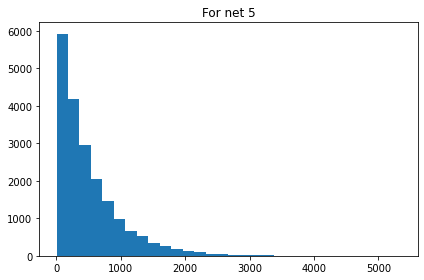

In [ ]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist(meet_array_net5, bins=30)
ax.set_title('For net 5')

Text(0.5, 1.0, 'For net 7')

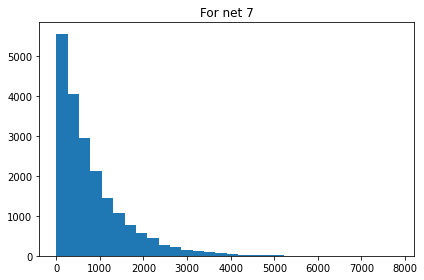

In [ ]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist(meet_array_net7, bins=30)
ax.set_title('For net 7')

Solution: Question3

In [ ]:
def spread(nodes):
  #set of nodes that will spread the rumor this time
  new_list = []           #all those persons who will get the rumor from nodes

  for node in nodes:
    x = np.random.choice(np.arange(1, 4), p=[0.75, 0.2, 0.05])
    if x ==2:
      #will send to any two randomly
      temp = node.nhbs.copy()
      temp.remove(node.sender)
      i = temp[np.random.randint(0, len(temp))]
      new_list.append(i)
      i.sender = node
      temp.remove(i)
      j = temp[np.random.randint(0, len(temp))]
      new_list.append(j)
      j.sender = node
      ##
    elif x==3:
      # it sends to all its neighbours
      temp = node.nhbs.copy()
      temp.remove(node.sender)
      for nd in temp:
        nd.sender = node
      new_list += temp
    return new_list
      



def tell_rumor_time(initiator_node, nodes):
  currently_known_to = initiator_node.nhbs.copy()
  new_list = currently_known_to.copy()
  for nd in currently_known_to:
    nd.sender = initiator_node
  currently_known_to.append(initiator_node)
  time = 1
  # each time a set of nodes are allowed to send the messages
  while len(currently_known_to) < len(nodes)/2:
    time +=1 
    current_new_list = spread(new_list)
    intersection = set(current_new_list).intersection(currently_known_to)
    if intersection == set(current_new_list):
      break
    else:
      new_list_set = set(current_new_list) - intersection
      new_list = list(new_list_set)
      currently_known_to += new_list
    
  return time, len(currently_known_to)
nodes_net5 =  give_nodes(net5)
nodes_net7 =  give_nodes(net7)

In [ ]:
times = 200000
rumor_convg_time_net5 = []
rumor_len_net5 = []
rumor_convg_time_net7 = []
rumor_len_net7 = []
rumor_convg_time_net1 = []
rumor_len_net1 = []


for time in tqdm_notebook(range(times)):
# for time in (range(times)):
  t5, l5 = tell_rumor_time(nodes_net5[0], nodes_net5) #time and number of nodes it is known to
  t7, l7 = tell_rumor_time(nodes_net7[0], nodes_net7) #time and number of nodes it is known to
  t1, l1 = tell_rumor_time(nodes_net1[8], nodes_net1) #time and number of nodes it is known to
  rumor_convg_time_net5.append(t5)
  rumor_len_net5.append(l5)
  rumor_convg_time_net7.append(t7)
  rumor_len_net7.append(l7)
  rumor_convg_time_net1.append(t1)
  rumor_len_net1.append(l1)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


The estimation of how soon the population sees the message will be very much close to zero for net5 and net7.

In [ ]:
t = 0
for l in range(len(rumor_len_net1)):
  if rumor_len_net1[l] >= len(nodes_net1)/2:
    t+=1
print('Probability = ',t/len(rumor_len_net1))
print(np.mean(rumor_convg_time_net1))

Probability =  1.0
1.0


In [ ]:
t = 0
for l in range(len(rumor_len_net5)):
  if rumor_len_net5[l] >= len(nodes_net5)/2:
    t+=1
print('Probability = ',t/len(rumor_len_net5))

Probability =  0.0


In [ ]:
t = 0
for l in range(len(rumor_len_net7)):
  if rumor_len_net7[l] >= len(nodes_net7)/2:
    t+=1
print('Probability = ',t/len(rumor_len_net7))

Probability =  0.0
